Saving emisiones_final.csv to emisiones_final (7).csv


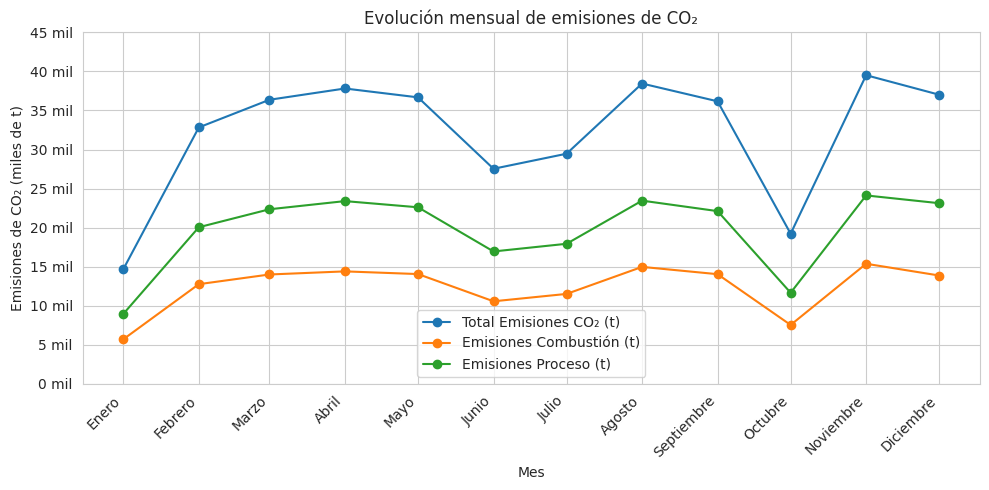

In [8]:
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt

# Subir archivo
uploaded = files.upload()
fname = list(uploaded.keys())[0]

# Leer CSV
df = pd.read_csv(fname, decimal=",", sep=";", encoding='latin-1', index_col='Unnamed: 0')

# Rename columns to match the expected names
df.columns = ["Emisiones_combustion_tCO2", "Emisiones_proceso_tCO2", "Total_emisiones_tCO2"]

# The index currently contains month names (Enero, Febrero, etc.). We need to convert this index to datetime objects.
# Since the year is not in the data, we can assume a dummy year (e.g., 2000) for plotting purposes.
# We will create a mapping from month names to month numbers and then create datetime objects.

month_mapping = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4, 'Mayo': 5, 'Junio': 6,
    'Julio': 7, 'Agosto': 8, 'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

# Store the original month names before converting the index to datetime objects
original_month_names = df.index.tolist()


# Create a new index with datetime objects
df.index = pd.to_datetime([f'2000-{month_mapping[month]}-01' for month in df.index], errors='coerce')

# Rename the index
df.index.name = 'Mes'

# Convertir tipos for emission columns
df["Emisiones_combustion_tCO2"] = pd.to_numeric(df["Emisiones_combustion_tCO2"], errors="coerce")
df["Emisiones_proceso_tCO2"] = pd.to_numeric(df["Emisiones_proceso_tCO2"], errors="coerce")
df["Total_emisiones_tCO2"] = pd.to_numeric(df["Total_emisiones_tCO2"], errors="coerce")


# Quitar filas vacías
df = df.dropna().sort_index()

# Gráfico simple
plt.figure(figsize=(10,5))
plt.plot(df.index, df["Total_emisiones_tCO2"], marker="o", label="Total Emisiones CO₂ (t)")
plt.plot(df.index, df["Emisiones_combustion_tCO2"], marker="o", label="Emisiones Combustión (t)")
plt.plot(df.index, df["Emisiones_proceso_tCO2"], marker="o", label="Emisiones Proceso (t)")


plt.ylabel("Emisiones de CO₂ (miles de t)") # Update y-axis label
plt.xlabel("Mes")
plt.title("Evolución mensual de emisiones de CO₂")
plt.legend()
plt.grid(True)

# Set the x-axis ticks to be the datetime objects and the labels to be the original month names
plt.xticks(df.index, original_month_names, rotation=45, ha='right')

# Set the y-axis ticks to represent thousands
yticks = plt.yticks()[0]
plt.yticks(yticks, [f'{int(y)} mil' for y in yticks])


plt.tight_layout()
plt.show()